In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt 
from sklearn.model_selection import cross_val_predict  
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

Loading Data into Pandas dataframe

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

From above we can conclude that there are 1338 entries with seven features.

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


From above we can see that distribution of Age is between 18 to 64

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

There are no missing Values  in the data.

In [310]:
df1=df

male      676
female    662
Name: sex, dtype: int64


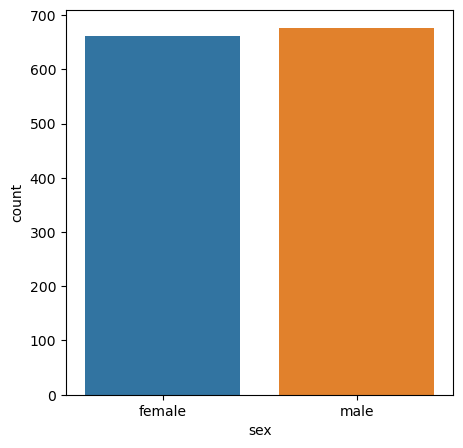

In [313]:
print(df1['sex'].value_counts())
plt.figure(figsize=(5,5))
bp4=sns.countplot(x='sex',data=df1)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<AxesSubplot:xlabel='region', ylabel='count'>

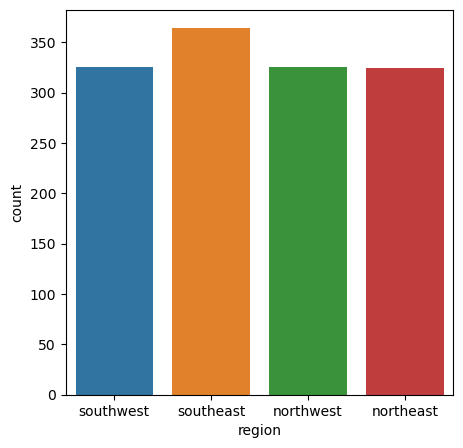

In [314]:
print(df1.region.value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df1['region'])

Text(0, 0.5, 'Count')

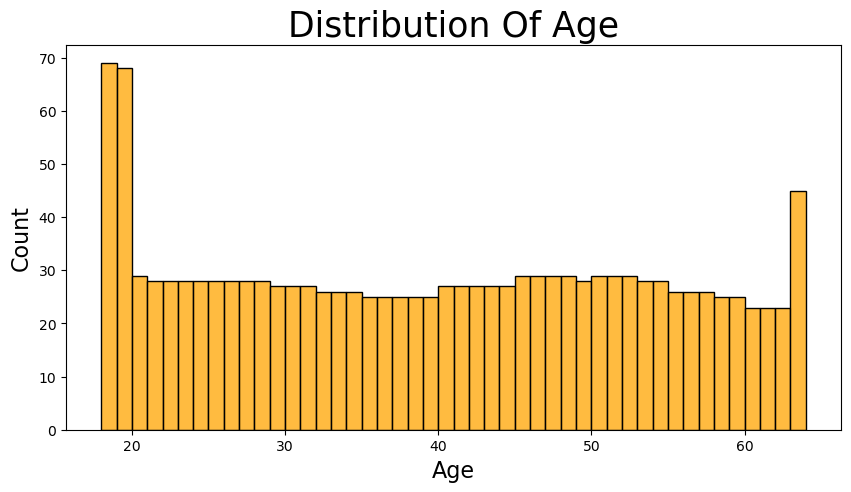

In [315]:
plt.figure(figsize=(10,5))
plt.title("Distribution Of Age",fontsize=25)
bp1=sns.histplot(x='age',data=df1,bins=46,color='orange')
bp1.set_xlabel("Age", fontsize=16)
bp1.set_ylabel("Count", fontsize=16)

Text(0, 0.5, 'Frequency')

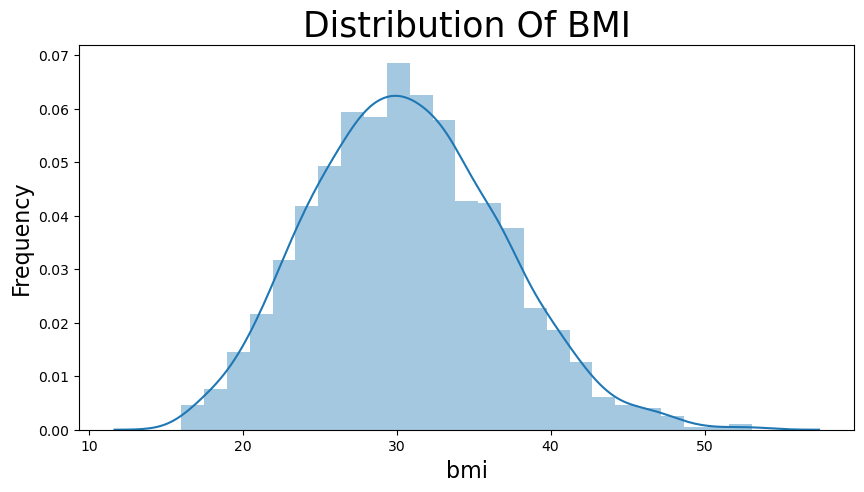

In [316]:
plt.figure(figsize=(10,5))
plt.title("Distribution Of BMI",fontsize=25)
g=sns.distplot(df1['bmi'])
g.set_xlabel("bmi", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)

<AxesSubplot:xlabel='expenses', ylabel='Count'>

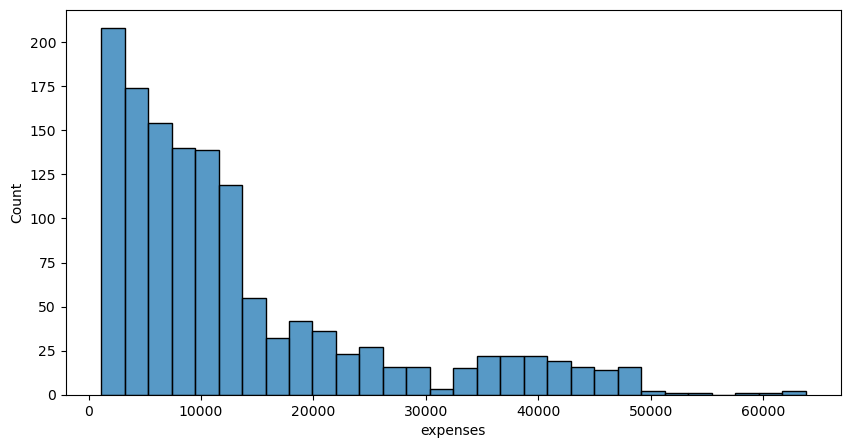

In [317]:
plt.figure(figsize=(10,5))
sns.histplot(x='expenses',data=df1)

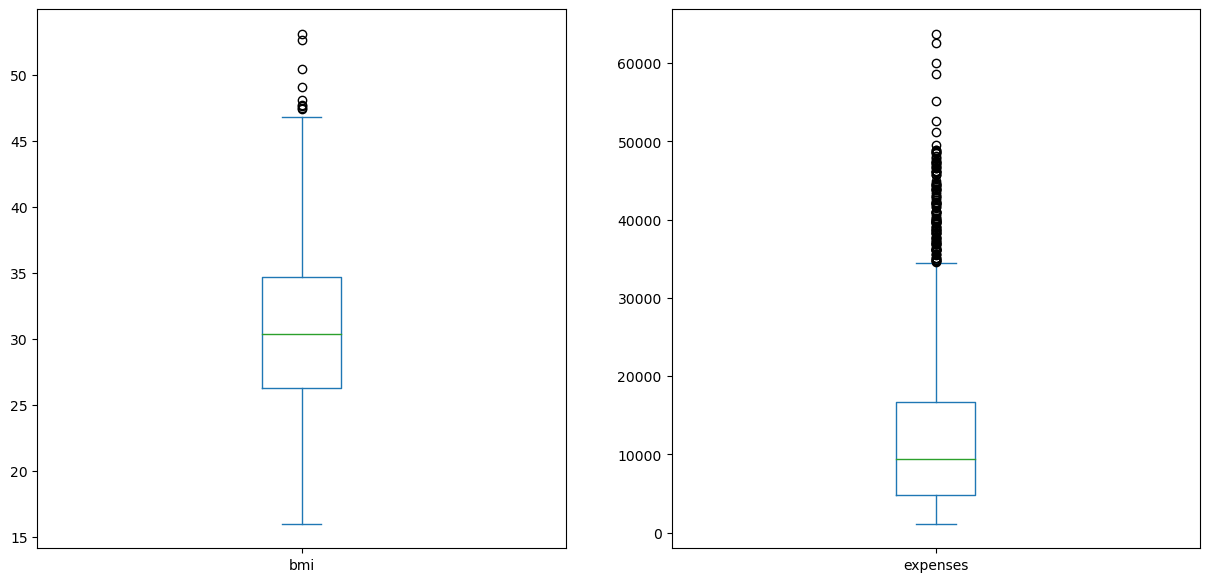

In [318]:
plt.subplots(figsize=(15,7))  
plt.subplot(1,2,1)         
df1['bmi'].plot.box()
plt.subplot(1,2,2)      
df1['expenses'].plot.box()

plt.show()

We can see from above barplot that there are some outliers in feature named bmi

From above barplot it is clear that there are some outliers in feature called expenses

In [319]:
perexp99 = df1['expenses'].quantile(0.99)
df1=df1[df1.expenses<=perexp99]
print('Outlier range for expenses is: ',perexp99)
perbmi99 = df1['bmi'].quantile(0.99)
df1=df1[df1.bmi<=perbmi99]
print('Outlier range for bmi is: ',perbmi99)

Outlier range for expenses is:  48537.480599999995
Outlier range for bmi is:  46.177


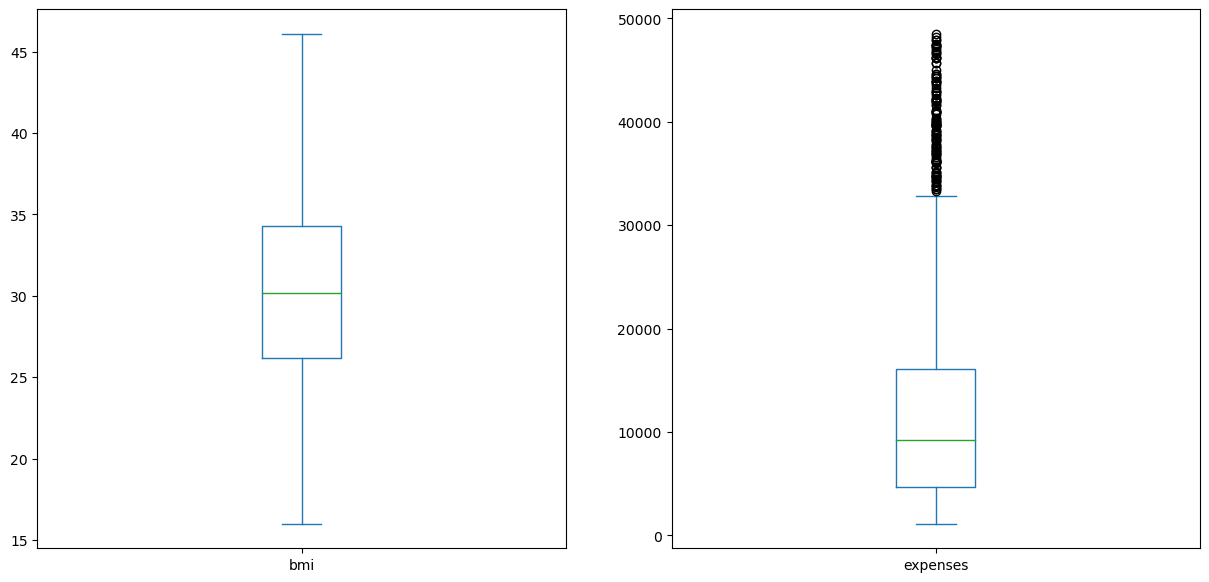

In [320]:
plt.subplots(figsize=(15,7))  
plt.subplot(1,2,1)         
df1['bmi'].plot.box()
plt.subplot(1,2,2)      
df1['expenses'].plot.box()

plt.show()

Text(0, 0.5, 'count')

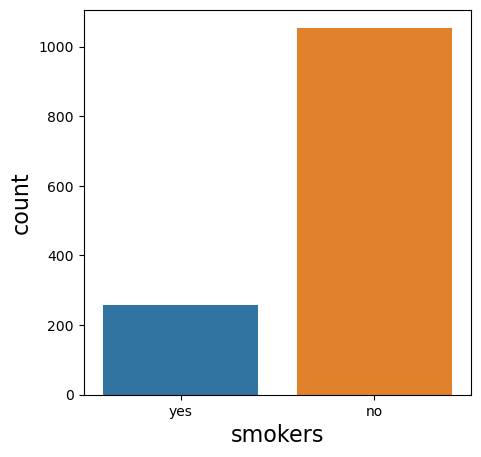

In [321]:
plt.figure(figsize=(5,5))
bp2=sns.countplot(x='smoker',data=df1)
bp2.set_xlabel("smokers", fontsize=16)
bp2.set_ylabel("count", fontsize=16)

Non smokers are more compared to smokers

Text(0, 0.5, 'smokers')

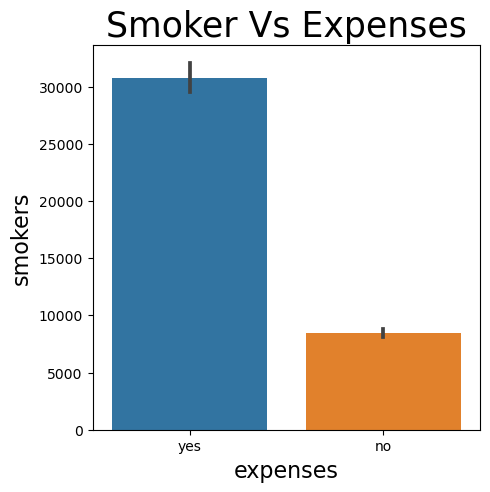

In [322]:
plt.figure(figsize=(5,5))
plt.title("Smoker Vs Expenses",fontsize=25)
bp3=sns.barplot(x='smoker',y='expenses',data=df1)
bp3.set_xlabel("expenses", fontsize=16)
bp3.set_ylabel("smokers", fontsize=16)

Expenses of smokers are more as compared to non smokers

Text(0, 0.5, 'expenses')

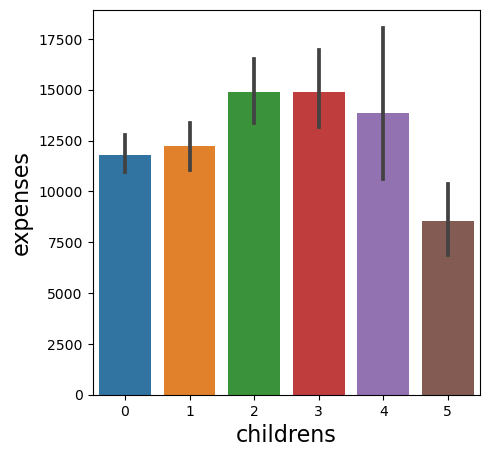

In [323]:
plt.figure(figsize=(5,5))
bp4=sns.barplot(x='children',y='expenses',data=df1)
bp4.set_xlabel("childrens", fontsize=16)
bp4.set_ylabel("expenses", fontsize=16)

Text(0, 0.5, 'expenses')

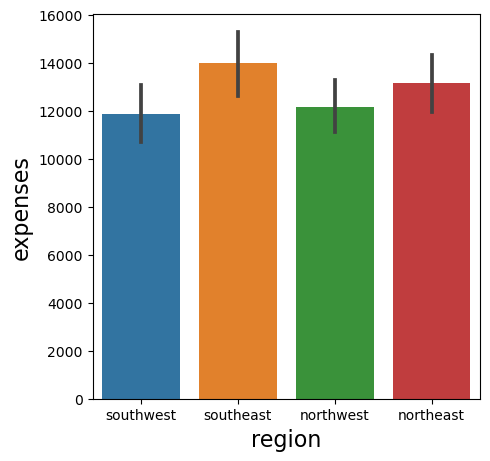

In [324]:
plt.figure(figsize=(5,5))
bp5=sns.barplot(x='region',y='expenses',data=df1)
bp5.set_xlabel("region", fontsize=16)
bp5.set_ylabel("expenses", fontsize=16)

Southeast region has more expenses then other region

Text(0, 0.5, 'count')

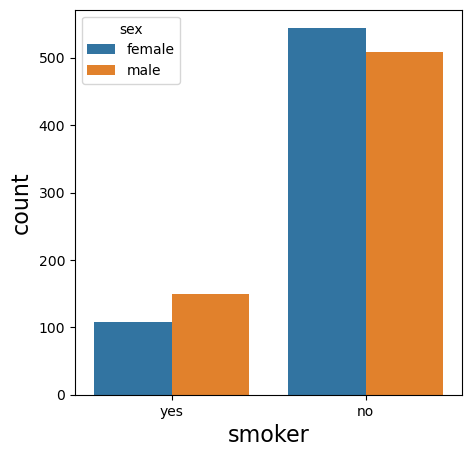

In [325]:
plt.figure(figsize=(5,5))
bp6=sns.countplot(x=df1.smoker,hue=df1.sex)
bp6.set_xlabel("smoker", fontsize=16)
bp6.set_ylabel("count", fontsize=16)

Male smokers are more compared to female

In [327]:
# encoding sex column
df1.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
df1.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df1.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [328]:
df1

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,0,1,16884.92
1,18,0,33.8,1,1,0,1725.55
2,28,0,33.0,3,1,0,4449.46
3,33,0,22.7,0,1,3,21984.47
4,32,0,28.9,0,1,3,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,1,3,10600.55
1334,18,1,31.9,0,1,2,2205.98
1335,18,1,36.9,0,1,0,1629.83
1336,21,1,25.8,0,1,1,2007.95


In [330]:
cor=df1.corr()
cor

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,0.022549,0.106918,0.041682,0.040976,0.011777,0.296983
sex,0.022549,1.000000,-0.037004,-0.017391,0.076552,0.006666,-0.058775
bmi,0.106918,-0.037004,1.000000,0.007093,0.025174,-0.238073,0.170962
children,0.041682,-0.017391,0.007093,1.000000,-0.014468,0.017522,0.082827
smoker,0.040976,0.076552,0.025174,-0.014468,1.000000,0.045752,-0.778626
region,0.011777,0.006666,-0.238073,0.017522,0.045752,1.000000,-0.043788
expenses,0.296983,-0.058775,0.170962,0.082827,-0.778626,-0.043788,1.000000


<AxesSubplot:>

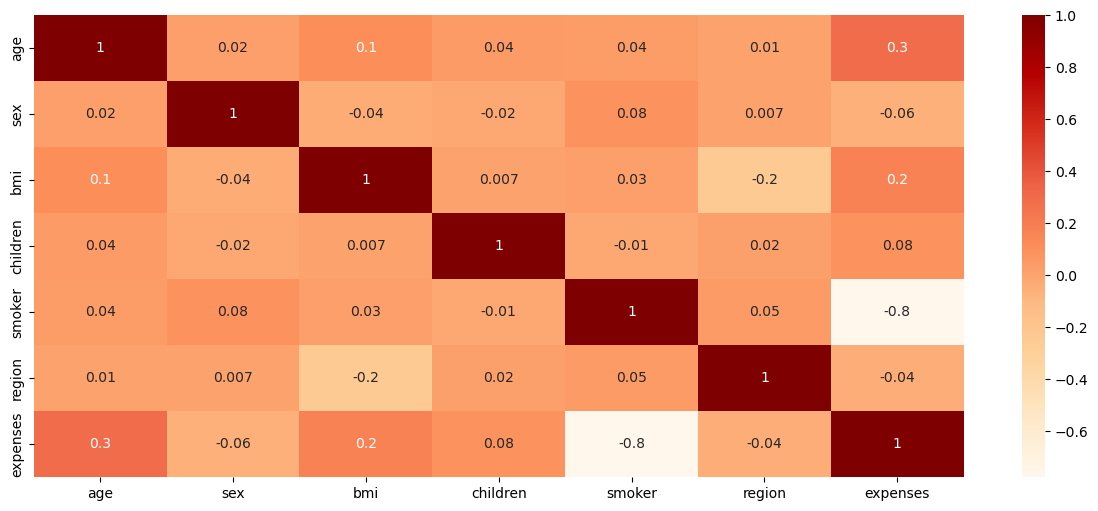

In [344]:
plt.figure(figsize=(15,6))
sns.heatmap(cor,fmt='.1g',cmap='OrRd',annot=True)

**Applying Machine Learning Models**

In [345]:
X=df1.drop(['expenses'],axis=1)
Y=df1['expenses']

**Dividing the data into train and Test**

In [347]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [348]:
def model_summary(model, model_name, cvn=20): # Default value for cvn = 20
    print(model_name)
    y_pred_model_train = model.predict(x_train)
    y_pred_model_test = model.predict(x_test)
    R2Score_model_train = r2_score(y_train, y_pred_model_train)
    print("Training R2 Score: ", R2Score_model_train)
    R2Score_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing R2 Score: ",  R2Score_model_test)
    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    print("RMSE for Training Data: ", RMSE_model_train)
    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
    print("RMSE for Testing Data: ", RMSE_model_test)
    y_pred_cv_model = cross_val_predict(model, X, Y, cv=cvn)
    accuracy_cv_model = r2_score(Y, y_pred_cv_model)
    print("Accuracy for", cvn,"- Fold Cross Predicted: ", accuracy_cv_model)

**1) Linear Regression**

In [349]:
regressor=LinearRegression()

In [350]:
regressor.fit(x_train,y_train)

LinearRegression()

In [351]:
model_summary(regressor, "Multiple_linear_Regression")

Multiple_linear_Regression
Training R2 Score:  0.7437658031161568
Testing R2 Score:  0.7385627946197646
RMSE for Training Data:  5755.04312519359
RMSE for Testing Data:  5810.902446038192
Accuracy for 20 - Fold Cross Predicted:  0.7394530653147398


**Applying Decision Tree**

In [352]:
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  
decision_tree_reg.fit(x_train, y_train) 
model_summary(decision_tree_reg, "Decision_Tree_Regression")

Decision_Tree_Regression
Training R2 Score:  0.8717686485617613
Testing R2 Score:  0.795330124218478
RMSE for Training Data:  4071.2441452322128
RMSE for Testing Data:  5141.4646155515775
Accuracy for 20 - Fold Cross Predicted:  0.8398744895852849


**Applying Random Forest**

In [353]:
random_forest_reg=RandomForestRegressor()
random_forest_reg.fit(x_train,y_train)

RandomForestRegressor()

In [354]:
model_summary(random_forest_reg,"Random_Forest_Regressor")

Random_Forest_Regressor
Training R2 Score:  0.9749064443822477
Testing R2 Score:  0.8243468020411614
RMSE for Training Data:  1800.9893254693857
RMSE for Testing Data:  4763.08046999462
Accuracy for 20 - Fold Cross Predicted:  0.8258228746253364


**Applying XGBoost**

In [363]:

xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123,verbosity=0)
  
# Fitting the model
xgb_r.fit(x_train, y_train)
  
# Predict the model
pred = xgb_r.predict(x_test.values)

In [364]:
model_summary(xgb_r,"Xg_boost")

Xg_boost
Training R2 Score:  0.9097461422864359
Testing R2 Score:  0.8301687643356918
RMSE for Training Data:  3415.56790788776
RMSE for Testing Data:  4683.480032528058
Accuracy for 20 - Fold Cross Predicted:  0.8402401382811941


We got R2 Score of 88.64% and Root mean square error of 4251 for test data

From above we conclude that XGBoost has maximum R2 Score and minimum Root Mean Square Error as compsared to other ML model

In [365]:
df1

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,0,1,16884.92
1,18,0,33.8,1,1,0,1725.55
2,28,0,33.0,3,1,0,4449.46
3,33,0,22.7,0,1,3,21984.47
4,32,0,28.9,0,1,3,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,1,3,10600.55
1334,18,1,31.9,0,1,2,2205.98
1335,18,1,36.9,0,1,0,1629.83
1336,21,1,25.8,0,1,1,2007.95


In [366]:
# input_data = (18,1,36.9,0,1,0)
input_data = (61,1,29.1,0,0,3)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = xgb_r.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[26807.436]
The insurance cost is USD  26807.436


In [362]:
# saving the model into the disk
import pickle


pickle.dump(xgb_r, open('model.pkl' , 'wb'))

# loading the model to disk
model = pickle.load(open('model.pkl','rb'))